(sec:DFT)=
# 6. Diskretna Fourierova transformacija

Prej smo spoznali Fourierovo transformacijo za vzorčene podatke (glejte poglavje {ref}`sec:enakomerno_casovno_vzorcenje`), kjer vzorčimo s korakom $\Delta t\,n$ in $n\in\mathbb{Z}$ gre od $-\infty$ do $+\infty$. Kadar imamo končno mnogo vzorčenih podatkov ($N$) in gre $n=[0,1,\dots,N-1]$, uporabimo diskretno Fourierovo transformacijo (DFT).

:::{note}

**Diskretna Fourierova transformacija**:

$$
X_k = \sum_{n=0}^{N-1} x_n\,\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,n/N},
$$

kjer velja $x_n = x(n\,\Delta t)$ in $X_k=X(k/(N\,\Delta t))$. Ker je DFT periodična z $1/\Delta t$ ($X_k=X_{k+N}$), je treba izračunati samo $N$ členov, torej $k=[0,1,\dots\,N-1]$.


:::

Da velja $X_k=X_{k+N}$, dokažemo z:

$$
\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,n/N}=\mathrm{e}^{-\mathrm{i}\,2\pi\,n\,(k+N)/N}=\mathrm{e}^{-\mathrm{i}\,2\pi\,n\,k/N}\,\underbrace{\mathrm{e}^{-\mathrm{i}\,2\pi\,n\,N/N}}_{=\cos(-2\pi\,n)=1}.
$$


Inverzno DFT izpeljemo, tako da zgornjo enačbo pomnožimo z $\mathrm{e}^{\mathrm{i}\,2\pi\,k\,r/N}$ in nato seštejemo po $k$:

$$
\sum_{k=0}^{N-1}X_k\,\mathrm{e}^{\mathrm{i}\,2\pi\,k\,r/N} = \sum_{k=0}^{N-1}\sum_{n=0}^{N-1} x_n\,\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,n/N}\,\mathrm{e}^{\mathrm{i}\,2\pi\,k\,r/N},
$$

nato na desni strani zamenjamo vrstni red vsote in ugotovimo:

$$
\sum_{k=0}^{N-1} \mathrm{e}^{-\mathrm{i}\,2\pi\,k\,(n-r)/N}=
\begin{cases}
1; &\quad n=r,\\
0 &\quad\textrm{sicer.}
\end{cases}
$$

Sledi:

$$
\sum_{n=0}^{N-1}x_r\,1=x_r\,N
$$

in nato izpeljemo:

$$
\sum_{k=0}^{N-1}X_k\,\mathrm{e}^{\mathrm{i}\,2\pi\,k\,r/N} = x_r\,N.
$$


:::{note}

**Inverzna diskretna Fourierova transformacija**:

$$
x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k\,\mathrm{e}^{\mathrm{i}\,2\pi\,k\,n/N},
$$
:::


ker velja:

$$
\mathrm{e}^{\mathrm{i}\,2\pi\,k\,n/N}=\mathrm{e}^{\mathrm{i}\,2\pi\,k\,(n+N)/N}=\mathrm{e}^{\mathrm{i}\,2\pi\,k\,n/N}\,\underbrace{\mathrm{e}^{\mathrm{i}\,2\pi\,k\,N/N}}_{=\cos(2\pi\,k)=1}.
$$

(DFT_periodicno)=

:::{note}

Ugotovimo, da je $x_n$ periodična vrsta $x_n=x_{n+N}$. Res smo začeli z vzorčenimi podatki v času $x_n$, ki niso periodični; rezultat z inverzno DFT pa je periodičen.

:::

## Hitra Fourierova transformacija

Hitra Fourierova transformacija (ang. *Fast Fourier Transform* $-$ FFT) je ime numeričnega algoritma za diskretno Fourierovo transformacijo. DFT ima numerični obseg proporcionalen z $N^2$, kar zapišemo kot $\mathcal{O}(N^2)$. Za avtorja hitre Fourierove transformacije veljata James Cooley in John Tukey, ki sta algoritem objavila leta 1965 (glejte [vir](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/S0025-5718-1965-0178586-1.pdf)), pozneje pa se je izkazalo, da je podoben algoritem že bistveno prej, v neobjavljenem delu iz leta 1805, odkril Carl Friedrich Gauss. Algoritem je, glede na DFT, numerično bistveno hitrejši: $\mathcal{O}(N\log(N))$; ker numerični obseg s številom elementov $N$ ne narašča kvadratično, je to bistveno povečalo uporabnost DFT. Nekateri algoritem FFT smatrajo kot enega najpomembnejših algoritmov, saj je imel (in še ima) zelo pomemben družbeno-ekonomski vpliv. Kot zanimivost lahko tukaj povemo, da algoritem ni bil patentiran (glejte [vir](https://en.wikipedia.org/wiki/Fast_Fourier_transform)). Zaradi simetrije v podatkih je hitrost izračuna najvišja, če je število vzorcev enako $2^n$, kjer $n\in\mathbb{Z}$.

Diskretna Fourierova transformacija je v paketu `numpy` dokumentirana [tukaj](https://numpy.org/doc/stable/reference/routines.fft.html) in si jo bomo najprej pogledali na spodnjem primeru sinusoide z amplitudo `A`, frekvenco `fr`, frekvenco vzorčenja `fs` in dolžino vzorčenja `N`, ki bo enaka frekvenci vzorčenja (vzorčili bomo torej 1 sekundo). DFT bomo izvedli z metodo `numpy.fft.fft()` ([dokumentacija](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft)).

In [1]:
import numpy as np

A = 1
fr = 5
fs = 100 
N = 100
dt = 1/fs
t = np.arange(N)*dt
x = A*np.sin(2*np.pi*fr*t)

X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=dt)

Sinusoida ima samo eno frekvenčno komponento različno od nič:

In [2]:
(X[freq==fr], np.abs(X[freq==fr]))

(array([-1.62040942e-14-50.j]), array([50.]))

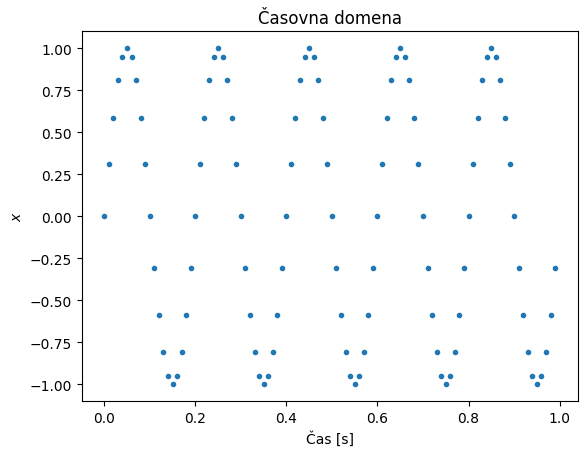

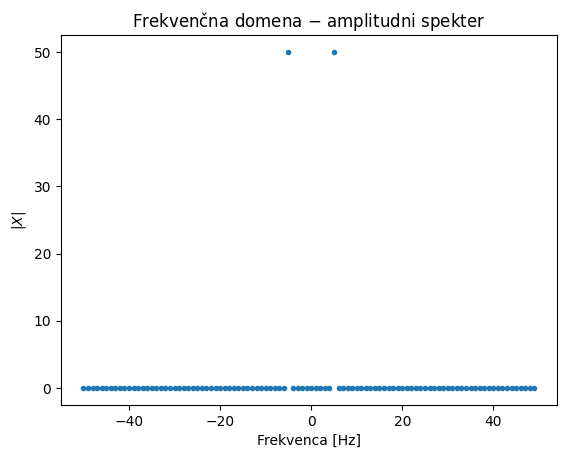

In [3]:
import matplotlib.pyplot as plt

plt.title('Časovna domena')
plt.plot(t, x, '.')
plt.xlabel('Čas [s]')
plt.ylabel('$x$')
plt.show()

plt.title('Frekvenčna domena $-$ amplitudni spekter')
plt.plot(freq, np.abs(X), '.')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('$|X|$')
plt.show()

## Fourierove vrste in diskretna Fourierova transformacija

Diskretna Fourierova transformacija je s Fourierovimi vrstami zelo povezana. Povezavo lahko hitro razkrijemo, če predpostavimo diskretno časovno vrsto $x_i=x(\Delta t\,i)$, kjer je $\Delta t$ konstanten časovni korak, $i=0,1,\dots,N-1$ in $T_p=N\,\Delta t$; sledi: 

$$
\begin{split}
c_k &= \frac{1}{T_p}\,\int_0^{T_p} x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,t/T_p}\,\mathrm{d}t\\
&= \frac{1}{N\,\Delta t}\,\sum_{n=0}^{N-1} x(n\,\Delta t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,\Delta t\,n/(N\,\Delta t)}\,\Delta t\\
&= \frac{1}{N}\,\underbrace{\sum_{n=0}^{N-1} x(n\,\Delta t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,n/N}}_{X_k}\\
&= \frac{X_k}{N}.\\
\end{split}
$$

Poudariti je treba, da v splošnem velja $X_k/N\ne c_k$, saj DFT temelji na končni vrsti in je zato $X_k$ periodična vrsta.

Pri primerjanju DFT in Fourierovih vrst pogosto pride do napake pri razumevanju periode (predvsem zadnje diskretne točke). V zgornjem primeru sinusoide časovna točka pri `t = 1` eksplicitno ni vključena; implicitno pa je, saj smo zgoraj spoznali, da so vzorčeni podatki periodični in velja $x_n=x_{n+N}$. Poglejmo ta detajl pobliže; členi Fourierove vrste so definirani kot:

$$
c_n = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,n\,t/T_p}\,\mathrm{d}t.
$$


Izračunamo Fourierov koeficient za frekvenco `fr`:

In [4]:
import sympy as sym

t, fr, Tp, A = sym.symbols('t, fr, Tp, A')
π = sym.pi
i = sym.I

podatki = {fr: 5, A:1, Tp:1}

x = sym.sin(2*π*fr*t)
c = 1/Tp*sym.integrate(x*sym.exp(-i*2*π*fr*t/Tp), (t,0,Tp))

c.subs(podatki)

-I/2

Do istega rezultata pridemo prek DFT, vendar zadnja časovna točka eksplicitno ni vključena:

In [5]:
import numpy as np

A = 1
fr = 5
fs = 100 
N = 100
# Spodnja `fs` rezultira v vključenost zadnje točke. Rezultat bo napačen!
#fs = 100/1.01010101010101
dt = 1/fs
t = np.arange(100)*dt
x = A*np.sin(2*np.pi*fr*t)

X_r = np.fft.rfft(x)
freq_r = np.fft.rfftfreq(len(x), d=dt)

In [6]:
c = X_r[freq_r==fr] / len(x)
c

array([-1.49438567e-16-0.5j])

Prepričajmo se, da zadnja časovna točka eksplicitno ni vključena:

In [7]:
t[-3:]

array([0.97, 0.98, 0.99])

Če v kodi zgoraj spremenimo `fs` ali število točk, tako da je zadnja točka eksplicitno vključena, rezultat ne bo enak tistemu iz Fourierovih vrst!

## Frekvenčna ločljivost in dodajanje ničel

Frekvenčna ločljivost DFT je definirana z dolžino diskretne časovne vrste $x_i=x(\Delta t\,i)$, kjer je $\Delta t$ konstanten časovni korak, $i=0,1,\dots,N-1$; dolžina take vrste je torej $T_p=N\,\Delta t$, zato sledi, da je frekvenčna ločljivost:

$$
\Delta f= \frac{1}{N\,\Delta t}.
$$

Z daljšo časovno vrsto bi lahko imeli tudi boljšo frekvenčno ločljivost. Kadar dodatnih točk diskretne vrste ne moremo pridobiti, lahko frekvenčno ločljivost povečamo z dodajanjem ničel:

$$
\tilde{x}_n=
\begin{cases}
x_n;\quad & 0\le n\le N-1,\\
0;\quad & N\le n\le L-1.
\end{cases}
$$

Sledi: 

:::{note}

**diskretna Fourierova transformacija z dodajanjem ničel** (ang. *zero-padding*):

$$
\tilde{X}_k = \sum_{n=0}^{L-1} \tilde{x}_n\,\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,n/L}
= \sum_{n=0}^{N-1} x_n\,\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,n/L}.
$$

:::

Na takšen način pridobimo frekvenčno ločljivost:

$$
\Delta f = \frac{1}{L\,\Delta t},
$$

pri tem pa je treba poudariti, da gre samo za frekvenčno interpolacijo, ki nam omogoča podrobnejši vpogled; novih informacij z dodajanjem ničel ne dodajamo. Podobno kakor pri DFT, lahko ničle dodajamo v frekvenčni domeni in nato z inverzno diskretno Fourierovo transformacijo pridobimo bolj goste (interpolirane) časovne podatke.

Pri dodajanju ničel je potrebno paziti na normiranje podatkov; dodanih ničel namreč ne upoštevamo pri normiranju.

Spodnji primer prikazuje uporabo dodajanja ničel; s pomočjo komentarjev v kodi raziščite delovanje.

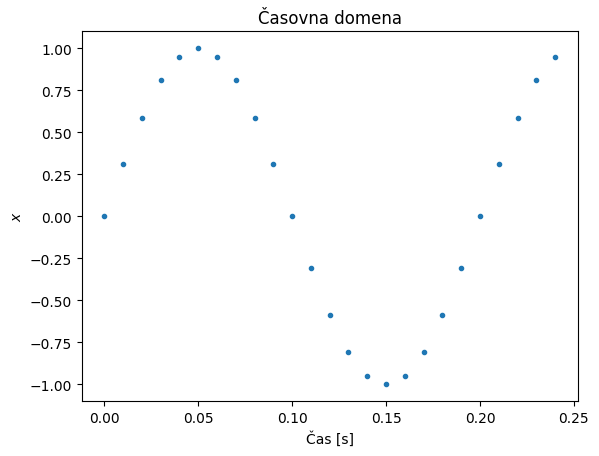

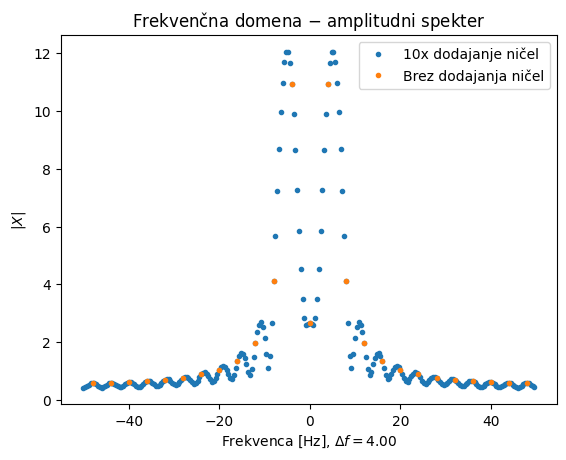

In [8]:
import numpy as np
import matplotlib.pyplot as plt


A = 1
fr = 5
fs = 100 
N = 25 # tukaj poskusite z 20 (sinusoida se zaključi; rezultat brez dodajanja ničel je točen!)
k = 10 # dodajanje ničel
dt = 1/fs
t = np.arange(N)*dt
x = A*np.sin(2*np.pi*fr*t)

X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=dt)

X_kx = np.fft.fft(x, n=k*N)
freq_kx = np.fft.fftfreq(k*N, d=dt)


plt.title('Časovna domena')
plt.plot(t, x, '.')
plt.xlabel('Čas [s]')
plt.ylabel('$x$')
plt.show()

plt.title('Frekvenčna domena $-$ amplitudni spekter')
plt.plot(freq_kx, np.abs(X_kx), '.', label=f'{k}x dodajanje ničel')
plt.plot(freq, np.abs(X), '.', label='Brez dodajanja ničel')
plt.xlabel(f'Frekvenca [Hz], $\\Delta f=${1/(N*dt):3.2f}')
plt.ylabel('$|X|$')
plt.legend()
plt.show()

## Simetrija DFT za realne podatke

:::{note}

Za realne podatke v frekvenčni domeni velja:

$$
\begin{split}
\textrm{Re}\big(X(k)\big)&=\textrm{Re}\big(X(N-k)\big),\\
\textrm{Im}\big(X(k)\big)&=-\textrm{Im}\big(X(N-k)\big),\\
|X(k)|&=|X(N-k)|,\\
\angle X(k)&=\angle X(N-k).
\end{split}
$$

:::


Ker je večina inženirskih podatkov v časovni domeni realnih, je smiselno, da se uporabi ustrezno prilagojena metoda hitre Fourierove transformacije; ta je v paketu `numpy` dostopna prek klica `numpy.fft.rfft()`. Inverzna DFT je dosegljiva prek metod `numpy.fft.ifft` oz. `numpy.fft.irfft` v primeru realnih podatkov v časovni domeni.

Navedene lastnosti preverimo na kodi v paketu `numpy` (opomba: k časovnim signalom dodamo šum, da ni faza zelo blizu 0):

In [9]:
import numpy as np

A = 1
fr = 5
fs = 100 
N = 10
dt = 1/fs
t = np.arange(N)*dt
np.random.seed(0)
x = A*np.sin(2*np.pi*fr*t) + np.random.normal(scale=A/2, size=N)

X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), d=dt)

X_r = np.fft.rfft(x)
freq_r = np.fft.rfftfreq(len(x), d=dt)

np.testing.assert_allclose(freq[1:N//2], -freq[:N//2:-1])
np.testing.assert_allclose(np.real(X[1:N//2]), np.real(X[:N//2:-1]))
np.testing.assert_allclose(np.imag(X[1:N//2]), -np.imag(X[:N//2:-1]))

np.testing.assert_allclose(np.abs(freq[:N//2+1]), freq_r)
np.testing.assert_allclose(np.real(X[:N//2+1]), np.real(X_r))
np.testing.assert_allclose(np.imag(X[:N//2+1]), np.imag(X_r), atol=1e-15)

Še zgornji primer z `numpy.fft.rfft()`:

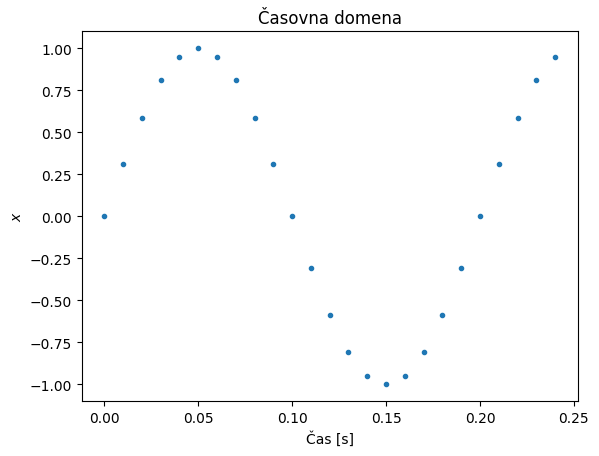

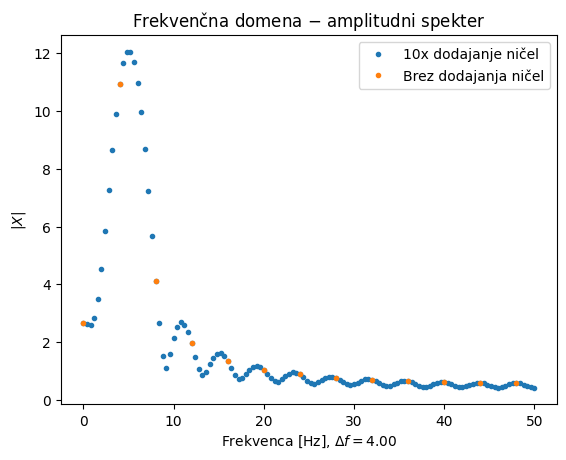

In [10]:
import numpy as np
import matplotlib.pyplot as plt


A = 1
fr = 5
fs = 100 
N = 25 # tukaj poskusite z 20 (sinusoida se zaključi; rezultat brez dodajanja ničel je točen!)
k = 10 # dodajanje ničel
dt = 1/fs
t = np.arange(N)*dt
x = A*np.sin(2*np.pi*fr*t)

X = np.fft.rfft(x)
freq = np.fft.rfftfreq(len(x), d=dt)

X_kx = np.fft.rfft(x, n=k*N)
freq_kx = np.fft.rfftfreq(k*N, d=dt)


plt.title('Časovna domena')
plt.plot(t, x, '.')
plt.xlabel('Čas [s]')
plt.ylabel('$x$')
plt.show()

plt.title('Frekvenčna domena $-$ amplitudni spekter')
plt.plot(freq_kx, np.abs(X_kx), '.', label=f'{k}x dodajanje ničel')
plt.plot(freq, np.abs(X), '.', label='Brez dodajanja ničel')
plt.xlabel(f'Frekvenca [Hz], $\\Delta f=${1/(N*dt):3.2f}')
plt.ylabel('$|X|$')
plt.legend()
plt.show()

(sec:krozna_konvolucija)=
## Konvolucija periodičnih podatkov

Konvolucijo funkcij v primeru Fourierove integralske transformacije smo obravnavali v poglavju {ref}`sec:konvolucija_funkcij`, tukaj si bomo pogledali posebnosti pri obravnavi dveh periodičnih vrst (glejte poglavje {ref}`sec:identifikacija_harmonskih_signalov`) enake dolžine: $x_n$ in $y_n$:


$$
X_k = \sum_{n=0}^{N-1} x_n\,\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,n/N},
$$


$$
Y_k = \sum_{n=0}^{N-1} y_n\,\mathrm{e}^{-\mathrm{i}\,2\pi\,k\,n/N}.
$$

Podobno kakor za funkcije, velja tudi za periodične časovne vrste, da je DFT konvolucije v časovni domeni produkt frekvenčnih transformirank.

:::{note}

Konvolucija periodičnih podatkov (tudi krožna konvolucija, ang. *circular convolution*):

$$
\textrm{DFT}\big\{x_n*y_n\big\}=X_k\,Y_k.
$$

Da se poudari, da gre za krožno konvolucijo, se kdaj uporabi tudi znak $\circledast$: $x_n\circledast y_n$.

:::

Poudarjanje periodičnosti $x_n$ in $y_n$ je nujno, sicer (krožna) konvolucija ni mogoča; to bo jasno iz sledeče izpeljave:

$$
\begin{split}
\textrm{DFT}\big\{x_n\circledast y_n\big\}&=\textrm{DFT}\big\{\sum_r^{N-1}x_r\,y_{n-r}\big\}\\
&=\sum_n^{N-1}\sum_r^{N-1}x_r\,y_{n-r}\,\mathrm{e}^{-\textrm{i}\,2\pi\,n\,k/N}\\
&=\underbrace{\sum_r^{N-1}x_r\,\,\mathrm{e}^{-\textrm{i}\,2\pi\,r\,k/N}}_{X_k}\,\underbrace{\sum_n^{N-1}y_{n-r}\,\mathrm{e}^{-\textrm{i}\,2\pi\,(n-r)\,k/N}}_{Y_k}\\
&=X_k\,Y_k.
\end{split}
$$

Pri zgornji izpeljavi je treba poudariti, da vsota po $r$ v predzadnji vrstici vključuje tudi vsoto po $n$, ker pa je vsota po $n$ zaradi periodičnosti neodvisna od $r$, se lahko vsoti po $r$ in $n$ izvedeta neodvisno. Zaradi periodičnosti $y_n$ za vsak $r$ torej velja:

$$
\sum_n^{N-1}y_{n-r}\,\mathrm{e}^{-\textrm{i}\,2\pi\,(n-r)\,k/N}=\sum_n^{N-1}y_{n}\,\mathrm{e}^{-\textrm{i}\,2\pi\,n\,k/N}=Y_k.
$$


Če vrsti $x_n$ in $y_n$ ne bi bili periodični, **konvolucija končnih vrst ne bi bila tako enostavna.**